## Problema 5 - Problemas de corazón

#### Marc Nebot Moyano

#### Librerías necesarias

In [808]:
from apafib import load_heart_failure
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                    accuracy_score, f1_score, precision_score, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

#### Apartado a)

##### Visualización de datos

Primeramente, haremos una observación del dataset del que disponemos

In [809]:
heart_failure_data = load_heart_failure()
heart_failure_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [810]:
heart_failure_data.shape

(299, 13)

In [811]:
heart_failure_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Podemos observar alguna correlación negativa relevante con la variable objetivo como por ejemplo time.

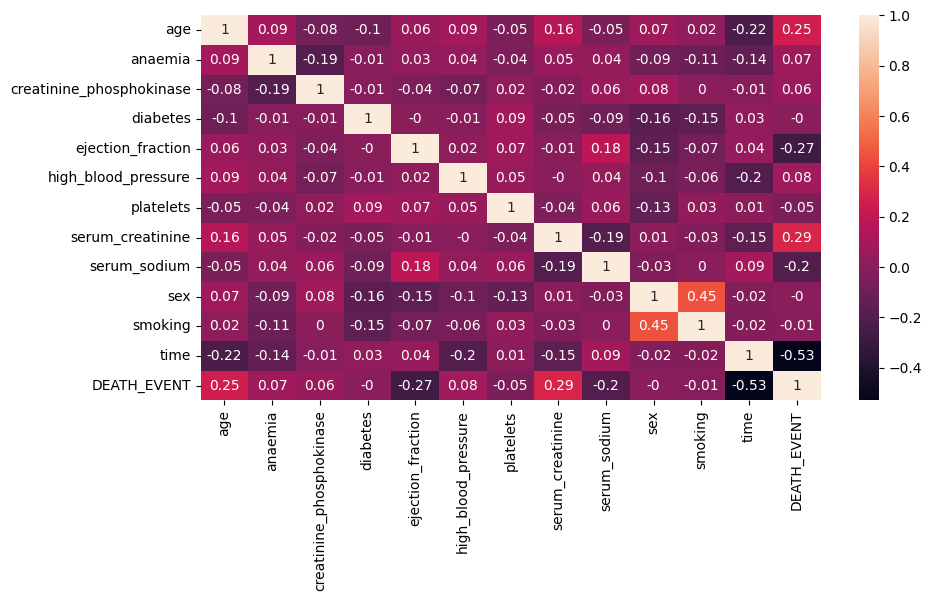

In [812]:
correlation_matrix = heart_failure_data.corr().round(2) # arrodonir a 2 decimals
plt.figure(figsize = (10,5))
sns.heatmap(data = correlation_matrix, annot = True);

In [813]:
variables_continuas = heart_failure_data.loc[:,['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine','serum_sodium','time']]
variables_continuas

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270
295,55.0,1820,38,270000.00,1.2,139,271
296,45.0,2060,60,742000.00,0.8,138,278
297,45.0,2413,38,140000.00,1.4,140,280


Vamos a visualizar los datos continuos para ver si se asemejan a distribuciones gaussianas

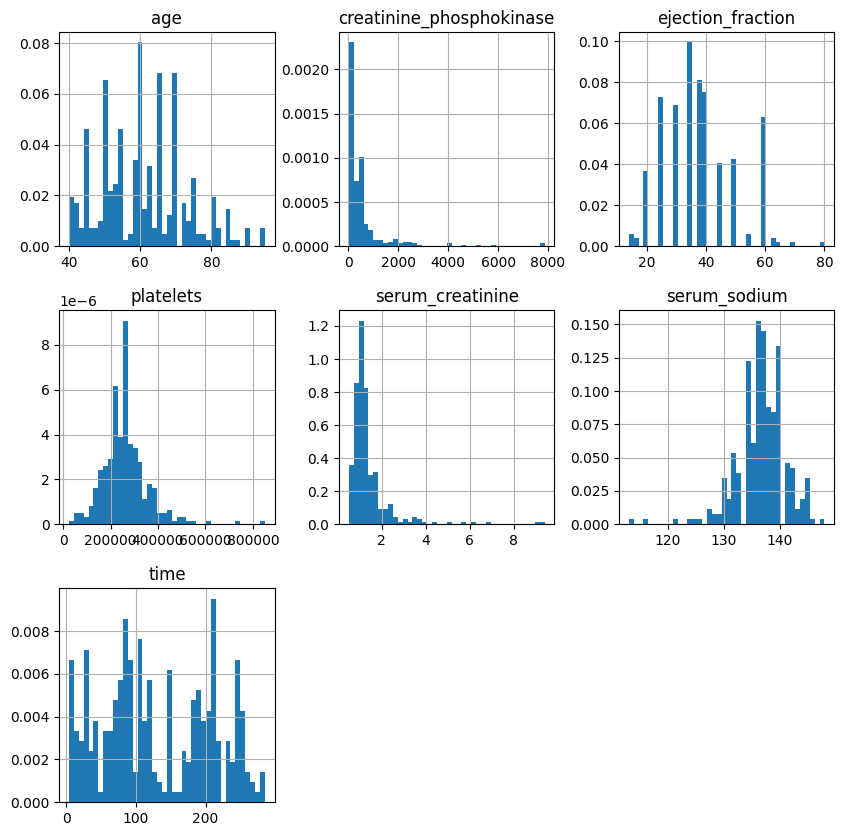

In [814]:
variables_continuas.hist(bins=40, density=True, figsize=(10,10));

##### Transformación logarítmica

Podemos observar que aquellas variables que no se asemejan demasiado a una distribución gaussiana son las siguientes: 'creatinine_phosphokinase','ejection_fraction', 'serum_creatinine', 'time'. Por lo tanto, las trataremos adecuadamente.

In [815]:
def transformacion_log_data(dataset,vars):
    for l in vars:
        column_array=dataset[l].array
        dataset[l] = np.array(map(lambda x:np.log(x),column_array))
    return dataset

Crearemos una copia del conjunto de datos obteniendo 2, uno con escala logaritmica y otro sin, los iremos comparando todo el tiempo.

In [816]:
log_vars = ['creatinine_phosphokinase','ejection_fraction', 'serum_creatinine', 'time']

log_heart_failure_data = transformacion_log_data(heart_failure_data.copy(),log_vars)
log_heart_failure_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,6.36647,0,2.995732,1,265000.00,0.641854,130,1,0,1.386294,1
1,55.0,0,8.969669,0,3.637586,0,263358.03,0.09531,136,1,0,1.791759,1
2,65.0,0,4.983607,0,2.995732,0,162000.00,0.262364,129,1,1,1.94591,1
3,50.0,1,4.70953,0,2.995732,0,210000.00,0.641854,137,1,0,1.94591,1
4,65.0,1,5.075174,1,2.995732,0,327000.00,0.993252,116,0,0,2.079442,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,4.110874,1,3.637586,1,155000.00,0.09531,143,1,1,5.598422,0
295,55.0,0,7.506592,0,3.637586,0,270000.00,0.182322,139,0,0,5.602119,0
296,45.0,0,7.630461,1,4.094345,0,742000.00,-0.223144,138,0,0,5.627621,0
297,45.0,0,7.788626,0,3.637586,0,140000.00,0.336472,140,1,1,5.63479,0


In [817]:
variables_transformadas=log_heart_failure_data.loc[:, ['creatinine_phosphokinase','ejection_fraction', 'serum_creatinine', 'time']]
variables_transformadas

,creatinine_phosphokinase,ejection_fraction,serum_creatinine,time
0,6.36647,2.995732,0.641854,1.386294
1,8.969669,3.637586,0.09531,1.791759
2,4.983607,2.995732,0.262364,1.94591
3,4.70953,2.995732,0.641854,1.94591
4,5.075174,2.995732,0.993252,2.079442
...,...,...,...,...
294,4.110874,3.637586,0.09531,5.598422
295,7.506592,3.637586,0.182322,5.602119
296,7.630461,4.094345,-0.223144,5.627621
297,7.788626,3.637586,0.336472,5.63479


Podemos observar que al ser tratadas hemos conseguido una distribución más similar a la gaussiana

<AxesSubplot: xlabel='time', ylabel='Count'>

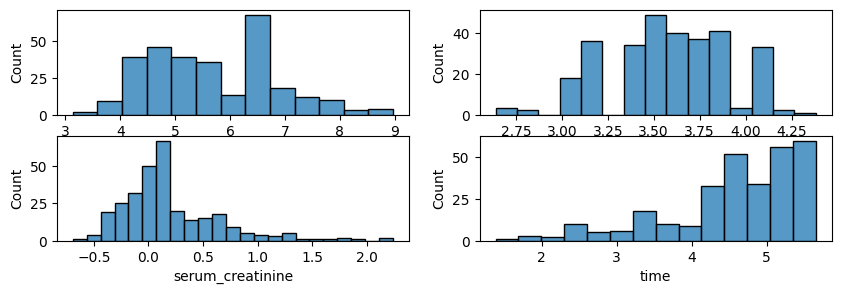

In [818]:
fig, ax = plt.subplots(2,2,figsize=(10,3))
sns.histplot(data = variables_transformadas, x='creatinine_phosphokinase',ax=ax[0,0])
sns.histplot(data = variables_transformadas, x='ejection_fraction',ax=ax[0,1])
sns.histplot(data = variables_transformadas, x='serum_creatinine',ax=ax[1,0])
sns.histplot(data = variables_transformadas, x='time',ax=ax[1,1])

##### Normalización de datos

Normalizaremos ambos conjuntos para obtener una mayor percepción de los datos, obviamente los datos discretos no los normalizaremos ya que estarán entre 0 y 1

In [819]:
variables_continuas = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine','serum_sodium','time']
heart_failure_data_min_max = heart_failure_data.copy()
heart_failure_data_min_max[variables_continuas] = MinMaxScaler().fit_transform(heart_failure_data[variables_continuas])
heart_failure_data_min_max.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,0.378798,0.431438,0.071299,0.418060,0.364903,0.351171,0.288833,0.100436,0.675012,0.648829,0.32107,0.449327,0.32107
std,0.216269,0.496107,0.123793,0.494067,0.179316,0.478136,0.118565,0.116237,0.126071,0.478136,0.46767,0.276207,0.46767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,0.200000,0.000000,0.011929,0.000000,0.242424,0.000000,0.227179,0.044944,0.600000,0.000000,0.00000,0.245552,0.00000
50%,0.363636,0.000000,0.028961,0.000000,0.363636,0.000000,0.287186,0.067416,0.685714,1.000000,0.00000,0.395018,0.00000
75%,0.545455,1.000000,0.071319,1.000000,0.469697,1.000000,0.337495,0.101124,0.771429,1.000000,1.00000,0.708185,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000


In [820]:
heart_failure_data_min_max_log = log_heart_failure_data.copy()
heart_failure_data_min_max_log[variables_continuas] = MinMaxScaler().fit_transform(log_heart_failure_data[variables_continuas])
heart_failure_data_min_max_log.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,0.378798,0.431438,0.432692,0.418060,0.546069,0.351171,0.288833,0.303946,0.675012,0.648829,0.32107,0.749406,0.32107
std,0.216269,0.496107,0.194447,0.494067,0.182485,0.478136,0.118565,0.154441,0.126071,0.478136,0.46767,0.210768,0.46767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,0.200000,0.000000,0.278071,0.000000,0.437265,0.000000,0.227179,0.200346,0.600000,0.000000,0.00000,0.680739,0.00000
50%,0.363636,0.000000,0.408964,0.000000,0.572890,0.000000,0.287186,0.268744,0.685714,1.000000,0.00000,0.787268,0.00000
75%,0.545455,1.000000,0.553802,1.000000,0.669894,1.000000,0.337495,0.350944,0.771429,1.000000,1.00000,0.920460,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000


##### Train and split de datos

Seguidamente, haremos la partición estratificada de nuestros dos conjuntos de datos

In [821]:
X = heart_failure_data_min_max.loc[:,heart_failure_data_min_max.columns != "DEATH_EVENT"]
y = heart_failure_data_min_max["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,stratify=y)

In [822]:
X = heart_failure_data_min_max_log.loc[:,heart_failure_data_min_max_log.columns != "DEATH_EVENT"]
y = heart_failure_data_min_max_log["DEATH_EVENT"]

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.3, random_state=25,stratify=y)

#### Apartado b)

In [823]:
def save_results(clf, xt, yt, nclf, df):
    df.loc[nclf,'test acc'] = accuracy_score(yt, clf.predict(xt))
    df.loc[nclf,'precision score (W)'] = precision_score(yt, clf.predict(xt), average='weighted')
    df.loc[nclf,'recall score (W)'] = recall_score(yt, clf.predict(xt), average='weighted')
    df.loc[nclf,'f1 score (W)'] = f1_score(yt, clf.predict(xt), average='weighted')
    return df

results_df = pd.DataFrame()
results_df_log = pd.DataFrame()

##### Modelo Naive Bayes conjunto de datos original

Seguidamente podemos observar que hemos obtenido un score de 0.77 con el conjunto de datos sin escala logaritmica

In [824]:
gnb = GaussianNB()
print(np.mean(cross_val_score(gnb,X_train,y_train,cv=10)))

0.7752380952380953


In [825]:
gnb_model = GaussianNB().fit(X_train, y_train)

print('Priors:', gnb_model.class_prior_)
print('Means:\n')
means =pd.DataFrame(gnb_model.theta_)
means.columns=X_train.columns
means

Priors: [0.67942584 0.32057416]
Means:



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.323005,0.408451,0.069179,0.408451,0.400235,0.323944,0.292357,0.074862,0.691348,0.661972,0.330986,0.534058
1,0.455541,0.477612,0.090127,0.402985,0.282225,0.447761,0.292377,0.145581,0.628145,0.626866,0.358209,0.254847


Podemos observar los diversos scores del modelo sin logaritmos, donde serán tratados dependiendo del contexto

In [826]:
print(classification_report(gnb_model.predict(X_test), y_test,target_names=['T', 'F']))
results_df = save_results(gnb_model, X_test, y_test, 'GNB', results_df)

              precision    recall  f1-score   support

           T       0.89      0.77      0.82        70
           F       0.45      0.65      0.53        20

    accuracy                           0.74        90
   macro avg       0.67      0.71      0.68        90
weighted avg       0.79      0.74      0.76        90



En la matriz de confusión observamos aquellos falsos positivos y negativos de nuestro modelo. Dependiendo del contexto seremos más o menos tolerantes a este tipo de fallos.

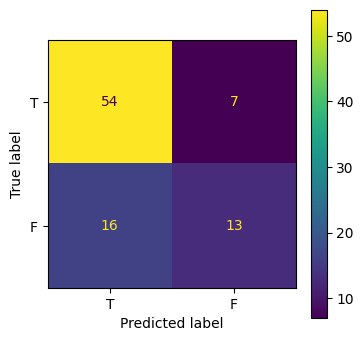

In [827]:
plt.figure(figsize=(4,4));
ConfusionMatrixDisplay.from_estimator(gnb_model, X_test,y_test, display_labels=['T', 'F'], ax=plt.subplot());

##### Modelo Naive Bayes conjunto de datos logarítmico

Seguidamente podemos observar un score de 0.83 del conjunto con escala logarítmica, vemos una mejoría pequeña

In [828]:
gnb = GaussianNB()
print(np.mean(cross_val_score(gnb,X_train_log,y_train_log,cv=10)))

0.8276190476190475


In [829]:
gnb_model_log = GaussianNB().fit(X_train_log, y_train_log)

print('Priors:', gnb_model_log.class_prior_)
print('Means:\n')
means =pd.DataFrame(gnb_model_log.theta_)
means.columns=X_train_log.columns
means

Priors: [0.67942584 0.32057416]
Means:



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.323005,0.408451,0.431822,0.408451,0.588214,0.323944,0.292357,0.260383,0.691348,0.661972,0.330986,0.829977
1,0.455541,0.477612,0.459018,0.402985,0.447941,0.447761,0.292377,0.379863,0.628145,0.626866,0.358209,0.589419


Seguidamente, son adjuntadas diversas puntuaciones que nos permiten hacer una mejor valoración del modelo según sus casos

In [830]:
print(classification_report(gnb_model_log.predict(X_test_log), y_test_log,target_names=['T', 'F']))
results_df_log = save_results(gnb_model_log, X_test_log, y_test_log, 'GNB Log', results_df_log)

              precision    recall  f1-score   support

           T       0.84      0.88      0.86        58
           F       0.76      0.69      0.72        32

    accuracy                           0.81        90
   macro avg       0.80      0.78      0.79        90
weighted avg       0.81      0.81      0.81        90



Como hemos explicado ya, dependemos del contexto del modelo para dictaminar la tolerancia de los fallos de nuestro modelo

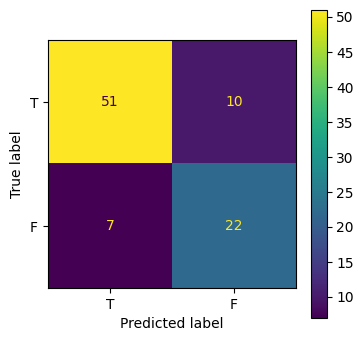

In [831]:
plt.figure(figsize=(4,4));
ConfusionMatrixDisplay.from_estimator(gnb_model_log, X_test_log,y_test_log, display_labels=['T', 'F'], ax=plt.subplot());

#### Apartado c)

##### Modelo LDA conjunto de datos original

Seguidamente vamos a efectuar un modelo LDA para ambos conjuntos de datos, primeramente empezaremos por el original

In [832]:
lda = LinearDiscriminantAnalysis()
print(np.mean(cross_val_score(lda,X_train,y_train,cv=10)))

0.8233333333333333


Hemos obtenido buenos resultados ya que tenemos un score 0.83, seguidamente iremos analizando más en profundidad este modelo

Priors: [0.67942584 0.32057416]
Means:

Intercepts:
Explained Variance Ratio
Coefs:


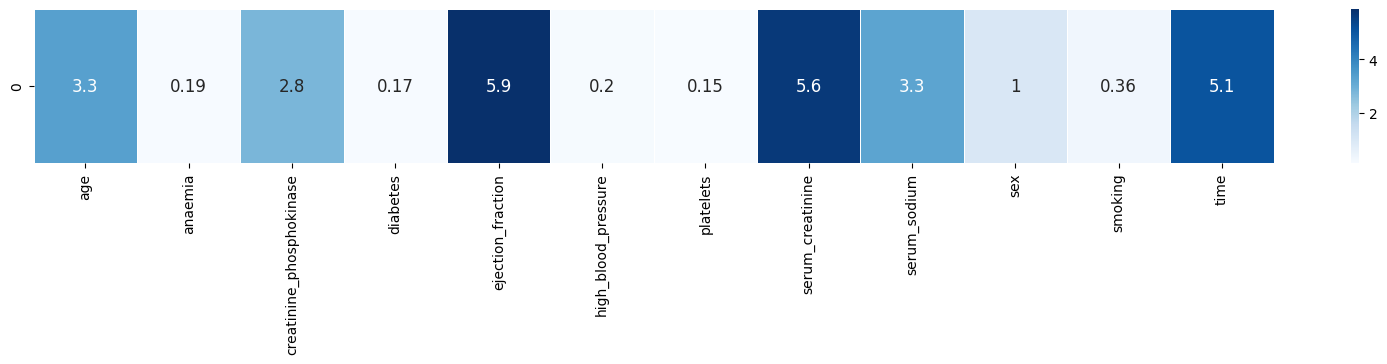

In [833]:
lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)

print('Priors:', lda_model.priors_)
print('Means:\n')
means =pd.DataFrame(lda_model.means_)
means.columns=X_train.columns
means

print('Intercepts:')
intercepts = pd.DataFrame(lda_model.intercept_)
intercepts

print('Explained Variance Ratio')
pd.DataFrame(lda_model.explained_variance_ratio_ )

print('Coefs:')
coefs = pd.DataFrame(lda_model.coef_)
coefs.columns = X_train.columns
# coefs.T

plt.figure(figsize=(20,2));
sns.heatmap(coefs.abs(),annot=True, linewidths=.5,cbar=True,xticklabels=True, cmap='Blues', annot_kws={'size':12});

Podemos ver en el modelo cuales son los atributos más importantes. Para saber la calidad del modelo podemos aplicarlo a los datos de test.

In [834]:
print(classification_report(lda_model.predict(X_test), y_test,target_names=['T', 'F']))
results_df = save_results(lda_model, X_test, y_test, 'LDA', results_df)

              precision    recall  f1-score   support

           T       0.87      0.87      0.87        61
           F       0.72      0.72      0.72        29

    accuracy                           0.82        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.82      0.82      0.82        90



Observamos la matriz de confusión, para ver qué lado sufre más desviaciones y cómo predice nuestro modelo. Dependiendo de la necesidad que tengamos deberemos corregir los falsos positivos o no, ya que depende mucho del contexto en el que nos situemos.

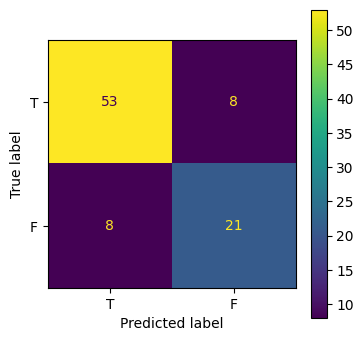

In [835]:
plt.figure(figsize=(4,4));
ConfusionMatrixDisplay.from_estimator(lda_model, X_test,y_test, display_labels=['T', 'F'], ax=plt.subplot());

##### Modelo LDA conjunto de datos logarítmico

Seguidamente haremos lo mismo pero con el conjunto de datos transformado

In [836]:
lda = LinearDiscriminantAnalysis()
print(np.mean(cross_val_score(lda,X_train_log,y_train_log,cv=10)))

0.8469047619047618


Observamos una mejoría bastante pequeña respecto al modelo original

Priors: [0.67942584 0.32057416]
Means:

Intercepts:
Explained Variance Ratio
Coefs:


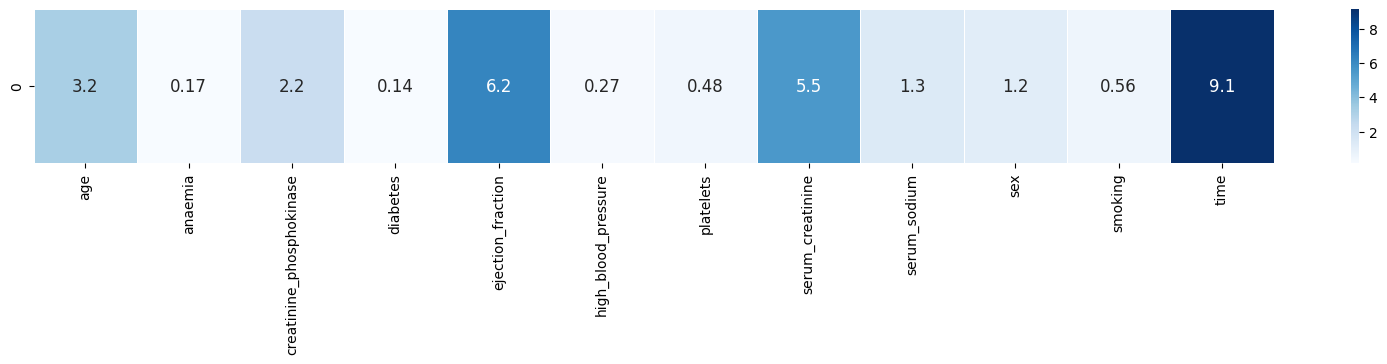

In [837]:
lda_model_log = LinearDiscriminantAnalysis().fit(X_train_log, y_train_log)

print('Priors:', lda_model_log.priors_)
print('Means:\n')
means =pd.DataFrame(lda_model_log.means_)
means.columns=X_train_log.columns
means

print('Intercepts:')
intercepts = pd.DataFrame(lda_model_log.intercept_)
intercepts

print('Explained Variance Ratio')
pd.DataFrame(lda_model_log.explained_variance_ratio_ )

print('Coefs:')
coefs = pd.DataFrame(lda_model_log.coef_)
coefs.columns = X_train_log.columns
# coefs.T

plt.figure(figsize=(20,2));
sns.heatmap(coefs.abs(),annot=True, linewidths=.5,cbar=True,xticklabels=True, cmap='Blues', annot_kws={'size':12});

Podemos observar aquellos coeficientes que han influenciado más a nuestro modelo

In [838]:
print(classification_report(lda_model_log.predict(X_test_log), y_test_log,target_names=['T', 'F']))
results_df_log = save_results(lda_model_log, X_test_log, y_test_log, 'LDA Log', results_df_log)

              precision    recall  f1-score   support

           T       0.90      0.86      0.88        64
           F       0.69      0.77      0.73        26

    accuracy                           0.83        90
   macro avg       0.80      0.81      0.80        90
weighted avg       0.84      0.83      0.84        90



Observamos la matriz de confusión, para ver qué lado sufre más desviaciones y cómo predice nuestro modelo. Dependiendo de la necesidad que tengamos deberemos corregir los falsos positivos o no, ya que depende mucho del contexto en el que nos situemos.

En este caso, la diferencia entre el conjunto de datos original y este es mínima.

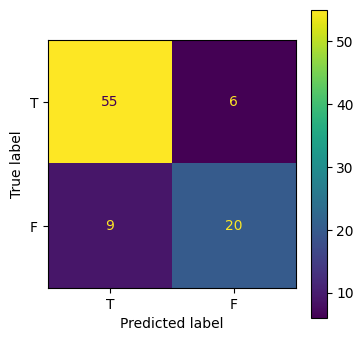

In [839]:
plt.figure(figsize=(4,4));
ConfusionMatrixDisplay.from_estimator(lda_model_log, X_test_log,y_test_log, display_labels=['T', 'F'], ax=plt.subplot());

#### Apartado d)

##### Modelo Regresión Logística conjunto de datos original

Seguidamente procederemos a entrenar un modelo de regresión logística en nuestros datos originales

In [840]:
lr = LogisticRegression(max_iter=1000,)
print(np.mean(cross_val_score(lr,X_train,y_train,cv=10)))

0.8135714285714286


In [841]:
param = {'penalty':['l2'], 'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs.fit(X_train, y_train);

Podemos observar que la mejor C es 15.8489 y la mejor penalty es l2, estas hacen que nuestros resultados sean óptimos.

In [842]:
show_html(pd.DataFrame(lr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
14,"{'C': 15.848931924611142, 'penalty': 'l2'}",0.828095,1
15,"{'C': 31.622776601683793, 'penalty': 'l2'}",0.823333,2
13,"{'C': 7.943282347242813, 'penalty': 'l2'}",0.823333,2
12,"{'C': 3.981071705534969, 'penalty': 'l2'}",0.823095,4
11,"{'C': 1.9952623149688788, 'penalty': 'l2'}",0.823095,4


Coefs:


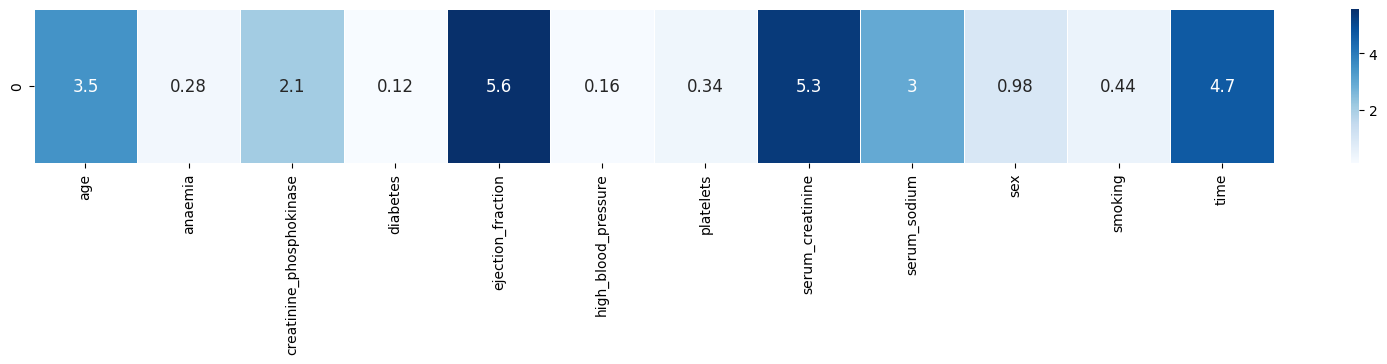

In [843]:
print('Coefs:')
coefs = pd.DataFrame(lr_gs.best_estimator_.coef_)
coefs.columns = X.columns

plt.figure(figsize=(20,2));
sns.heatmap(coefs.abs(),annot=True, linewidths=.5,cbar=True,xticklabels=True, cmap='Blues', annot_kws={'size':12});

In [844]:
print(classification_report(lr_gs.predict(X_test), y_test,target_names=['T', 'F']))
results_df = save_results(lr_gs, X_test, y_test, 'Logistic', results_df)

              precision    recall  f1-score   support

           T       0.87      0.87      0.87        61
           F       0.72      0.72      0.72        29

    accuracy                           0.82        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.82      0.82      0.82        90



Observamos los resultados que compararemos al final del todo

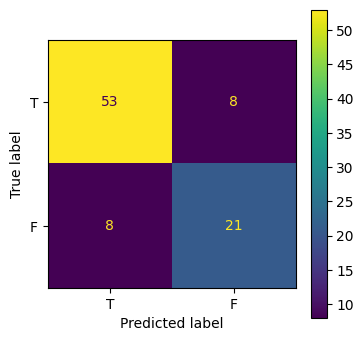

In [845]:
plt.figure(figsize=(4,4));
ConfusionMatrixDisplay.from_estimator(lr_gs, X_test,y_test, display_labels=['T', 'F'], ax=plt.subplot());

##### Modelo Regresión Logística conjunto de datos logarítmico

Haremos lo mismo pero para nuestros datos con logaritmos

In [846]:
lr = LogisticRegression(max_iter=1000)
print(np.mean(cross_val_score(lr,X_train_log,y_train_log,cv=10)))

0.8135714285714286


In [847]:
param = {'penalty':['l2'], 'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs_log =  GridSearchCV(lr,param,cv=10, n_jobs=-1, refit=True)
lr_gs_log.fit(X_train_log, y_train_log);

Encontramos que la C óptima es 31.6227766 y la mejor penalty l2

In [848]:
show_html(pd.DataFrame(lr_gs_log.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
15,"{'C': 31.622776601683793, 'penalty': 'l2'}",0.851905,1
14,"{'C': 15.848931924611142, 'penalty': 'l2'}",0.851905,1
20,"{'C': 1000.0, 'penalty': 'l2'}",0.847143,3
18,"{'C': 251.18864315095772, 'penalty': 'l2'}",0.847143,3
17,"{'C': 125.89254117941663, 'penalty': 'l2'}",0.847143,3


Coefs:


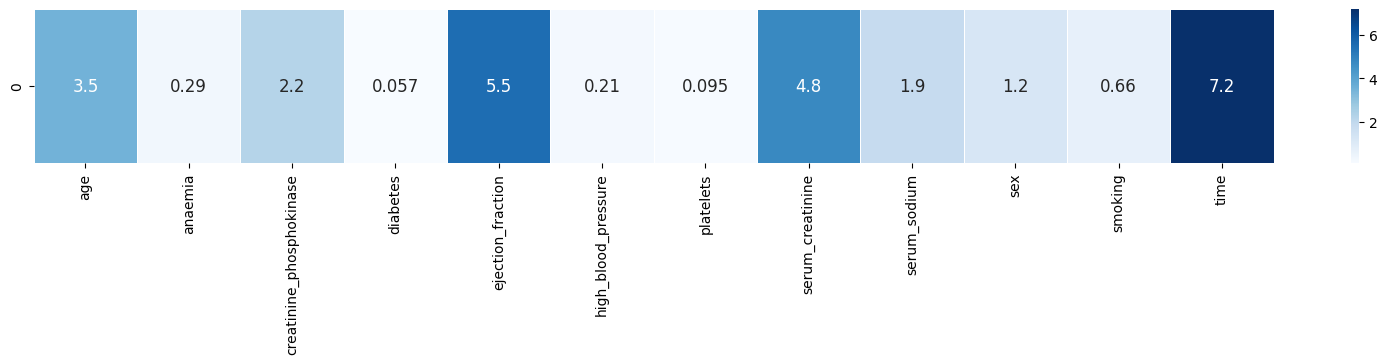

In [849]:
print('Coefs:')
coefs = pd.DataFrame(lr_gs_log.best_estimator_.coef_)
coefs.columns = X.columns

plt.figure(figsize=(20,2));
sns.heatmap(coefs.abs(),annot=True, linewidths=.5,cbar=True,xticklabels=True, cmap='Blues', annot_kws={'size':12});

In [850]:
print(classification_report(lr_gs_log.predict(X_test_log), y_test_log,target_names=['T', 'F']))
results_df_log = save_results(lr_gs_log, X_test_log, y_test_log, 'Logistic Log', results_df_log)

              precision    recall  f1-score   support

           T       0.90      0.87      0.89        63
           F       0.72      0.78      0.75        27

    accuracy                           0.84        90
   macro avg       0.81      0.83      0.82        90
weighted avg       0.85      0.84      0.85        90



Obtenemos los siguientes resultados muy similares a los del modelo LDA

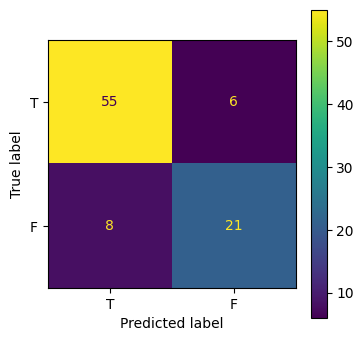

In [851]:
plt.figure(figsize=(4,4));
ConfusionMatrixDisplay.from_estimator(lr_gs_log, X_test_log,y_test_log, display_labels=['T', 'F'], ax=plt.subplot());

##### Modelo Regresión Logística conjunto de datos original balanceado

Seguidamente, ajustaremos una regresión logística balanceada para cada una de nuestros conjuntos

In [852]:
lrB = LogisticRegression(max_iter=1000, class_weight='balanced')
print(np.mean(cross_val_score(lrB,X_train,y_train,cv=10)))

0.7799999999999999


In [853]:
param = {'penalty':['l2'], 'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs =  GridSearchCV(lrB,param,cv=10, n_jobs=-1, refit=True)
lr_gs.fit(X_train, y_train);

In [854]:
print(classification_report(lr_gs.predict(X_test), y_test,target_names=['T', 'F']))
results_df = save_results(lr_gs, X_test, y_test, 'Logistic Balanced', results_df)

              precision    recall  f1-score   support

           T       0.77      0.87      0.82        54
           F       0.76      0.61      0.68        36

    accuracy                           0.77        90
   macro avg       0.76      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90



##### Modelo Regresión Logística conjunto de datos logarítmico balanceado

In [855]:
lrB = LogisticRegression(max_iter=1000, class_weight='balanced')
print(np.mean(cross_val_score(lrB,X_train_log,y_train_log,cv=10)))

0.8371428571428572


In [856]:
param = {'penalty':['l2'], 'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs_log =  GridSearchCV(lrB,param,cv=10, n_jobs=-1, refit=True)
lr_gs_log.fit(X_train_log, y_train_log);

In [857]:
print(classification_report(lr_gs_log.predict(X_test_log), y_test_log,target_names=['T', 'F']))
results_df_log = save_results(lr_gs_log, X_test_log, y_test_log, 'Logistic Log Balanced', results_df_log)

              precision    recall  f1-score   support

           T       0.82      0.89      0.85        56
           F       0.79      0.68      0.73        34

    accuracy                           0.81        90
   macro avg       0.81      0.78      0.79        90
weighted avg       0.81      0.81      0.81        90



##### Resultados

Finalmente aquí tenemos los resultados de nuestros conjuntos, podemos observar que los resultados de los modelos LDA y de regresión logística son ambos MUY similares, sin embargo, he podido comprobar que por muy poco un modelo de regresión logística funciona mejor en estos casos. También, he podido comprobar que si ajustamos los datos a una distribución gaussiana obtendremos mejores resultado que si no lo hiciéramos, por lo tanto, hemos comparado y demostrado qué modelo funciona mejor en estos casos y cómo debemos preprocesar y balancear los datos para obtener unos resultados óptimos.

In [858]:
results_df.sort_values(by=['test acc'], ascending=False)

,test acc,precision score (W),recall score (W),f1 score (W)
LDA,0.822222,0.822222,0.822222,0.822222
Logistic,0.822222,0.822222,0.822222,0.822222
Logistic Balanced,0.766667,0.786831,0.766667,0.772129
GNB,0.744444,0.732302,0.744444,0.729754


In [859]:
results_df_log.sort_values(by=['test acc'], ascending=False)

,test acc,precision score (W),recall score (W),f1 score (W)
Logistic Log,0.844444,0.842328,0.844444,0.842921
LDA Log,0.833333,0.830329,0.833333,0.830788
GNB Log,0.811111,0.817505,0.811111,0.813375
Logistic Log Balanced,0.811111,0.823133,0.811111,0.814571
